In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("multiclass_ddos.csv")

In [4]:
df.head()

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,0,17,2,2,0,1386,0,693,693,693.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,1,DrDoS_DNS
1,1,17,45,2,0,2944,0,1472,1472,1472.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,1,DrDoS_DNS
2,2,17,20816,200,0,88000,0,440,440,440.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,1,DrDoS_DNS
3,3,17,30139,174,0,76272,0,440,296,438.344828,...,0.0,0.0,0,0,0.0,0.0,0,0,1,DrDoS_DNS
4,4,17,25446,150,0,65424,0,440,152,436.160000,...,0.0,0.0,0,0,0.0,0.0,0,0,1,DrDoS_DNS


In [5]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [6]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values
X.shape

(42646, 67)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import *
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

               precision    recall  f1-score   support

    DrDoS_DNS       0.67      0.35      0.46       823
   DrDoS_LDAP       0.44      0.66      0.53       810
  DrDoS_MSSQL       0.00      0.00      0.00       771
    DrDoS_NTP       0.93      0.79      0.85       780
DrDoS_NetBIOS       0.67      0.81      0.73       753
   DrDoS_SNMP       0.97      1.00      0.99       832
   DrDoS_SSDP       0.49      0.83      0.61       738
    DrDoS_UDP       0.49      0.91      0.64       795
          Syn       0.98      0.39      0.55       718
         TFTP       0.62      1.00      0.76       719
      UDP-lag       0.55      0.20      0.30       791

     accuracy                           0.63      8530
    macro avg       0.62      0.63      0.58      8530
 weighted avg       0.62      0.63      0.58      8530

0.6294255568581477


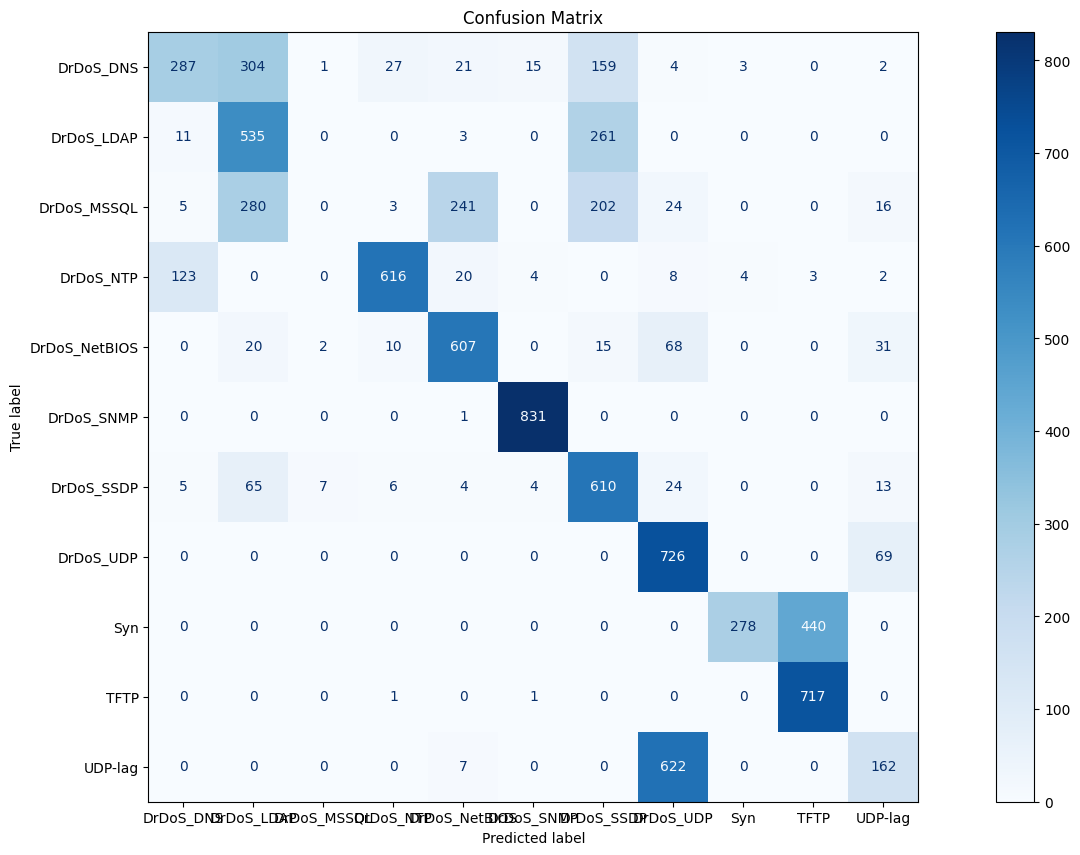

In [10]:
cm = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(20, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion Matrix")
plt.show()


In [11]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

               precision    recall  f1-score   support

    DrDoS_DNS       0.79      0.54      0.65       823
   DrDoS_LDAP       0.51      0.69      0.58       810
  DrDoS_MSSQL       0.60      0.30      0.40       771
    DrDoS_NTP       0.97      0.98      0.97       780
DrDoS_NetBIOS       0.85      0.81      0.83       753
   DrDoS_SNMP       1.00      1.00      1.00       832
   DrDoS_SSDP       0.60      0.88      0.71       738
    DrDoS_UDP       0.66      0.79      0.72       795
          Syn       0.86      0.44      0.58       718
         TFTP       0.63      0.93      0.75       719
      UDP-lag       0.71      0.59      0.64       791

     accuracy                           0.72      8530
    macro avg       0.74      0.72      0.71      8530
 weighted avg       0.74      0.72      0.71      8530

0.7235638921453693


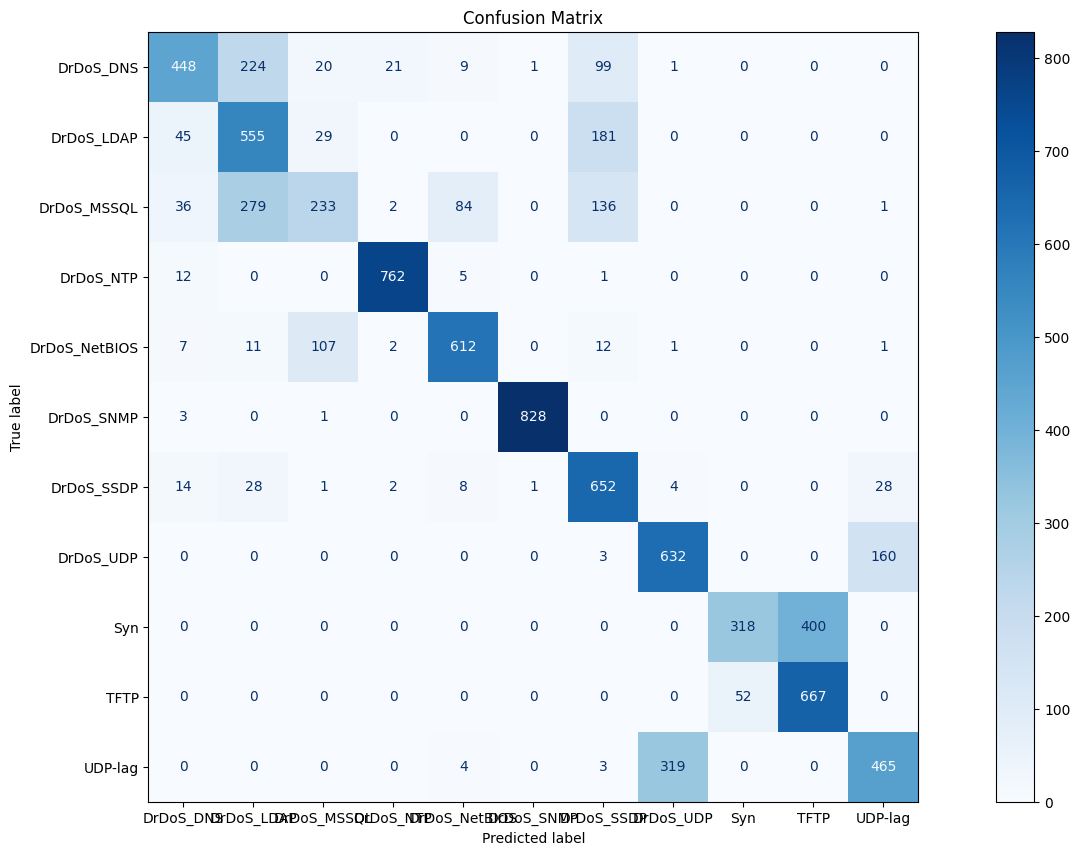

In [12]:
cm = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(20, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion Matrix")
plt.show()

In [13]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)
predictions = gnb.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

               precision    recall  f1-score   support

    DrDoS_DNS       0.82      0.06      0.10       823
   DrDoS_LDAP       0.34      0.99      0.51       810
  DrDoS_MSSQL       0.00      0.00      0.00       771
    DrDoS_NTP       0.67      0.70      0.69       780
DrDoS_NetBIOS       0.36      0.96      0.52       753
   DrDoS_SNMP       1.00      0.98      0.99       832
   DrDoS_SSDP       0.00      0.00      0.00       738
    DrDoS_UDP       0.41      0.52      0.46       795
          Syn       0.72      0.49      0.58       718
         TFTP       0.61      0.81      0.70       719
      UDP-lag       0.86      0.02      0.03       791

     accuracy                           0.50      8530
    macro avg       0.53      0.50      0.42      8530
 weighted avg       0.53      0.50      0.42      8530

0.5030480656506447


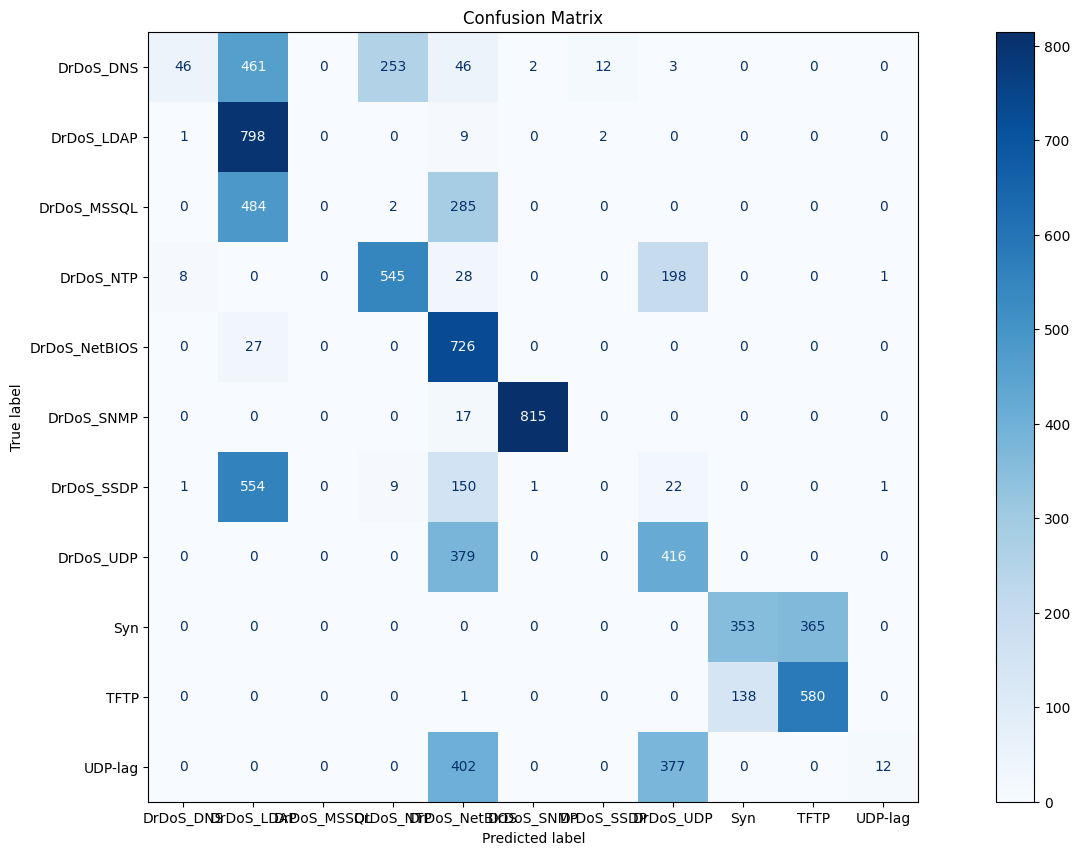

In [14]:
cm = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(20, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion Matrix")
plt.show()

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)

predictions = knn.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

               precision    recall  f1-score   support

    DrDoS_DNS       0.71      0.56      0.63       823
   DrDoS_LDAP       0.45      0.79      0.57       810
  DrDoS_MSSQL       0.42      0.25      0.31       771
    DrDoS_NTP       0.95      0.95      0.95       780
DrDoS_NetBIOS       0.76      0.79      0.77       753
   DrDoS_SNMP       0.99      0.99      0.99       832
   DrDoS_SSDP       0.77      0.56      0.65       738
    DrDoS_UDP       0.54      0.78      0.64       795
          Syn       0.82      0.48      0.61       718
         TFTP       0.63      0.89      0.74       719
      UDP-lag       0.57      0.34      0.43       791

     accuracy                           0.67      8530
    macro avg       0.69      0.67      0.66      8530
 weighted avg       0.69      0.67      0.66      8530

0.6739742086752638


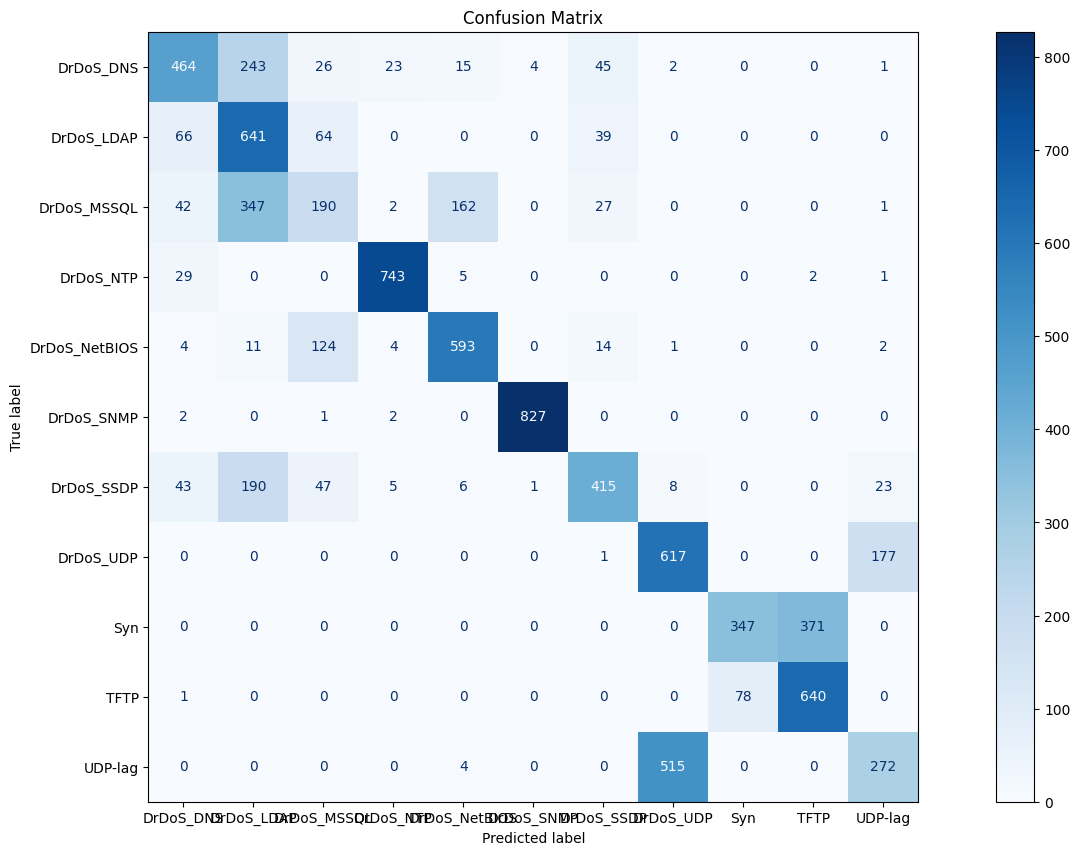

In [16]:
cm = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(20, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion Matrix")
plt.show()

In [17]:
from sklearn import tree

DTClassifier = tree.DecisionTreeClassifier()
DTClassifier.fit(X_train,y_train)

print("Decision Tree Score:",DTClassifier.score(X_test,y_test))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

Decision Tree Score: 0.7212192262602579
               precision    recall  f1-score   support

    DrDoS_DNS       0.71      0.56      0.63       823
   DrDoS_LDAP       0.45      0.79      0.57       810
  DrDoS_MSSQL       0.42      0.25      0.31       771
    DrDoS_NTP       0.95      0.95      0.95       780
DrDoS_NetBIOS       0.76      0.79      0.77       753
   DrDoS_SNMP       0.99      0.99      0.99       832
   DrDoS_SSDP       0.77      0.56      0.65       738
    DrDoS_UDP       0.54      0.78      0.64       795
          Syn       0.82      0.48      0.61       718
         TFTP       0.63      0.89      0.74       719
      UDP-lag       0.57      0.34      0.43       791

     accuracy                           0.67      8530
    macro avg       0.69      0.67      0.66      8530
 weighted avg       0.69      0.67      0.66      8530

0.6739742086752638


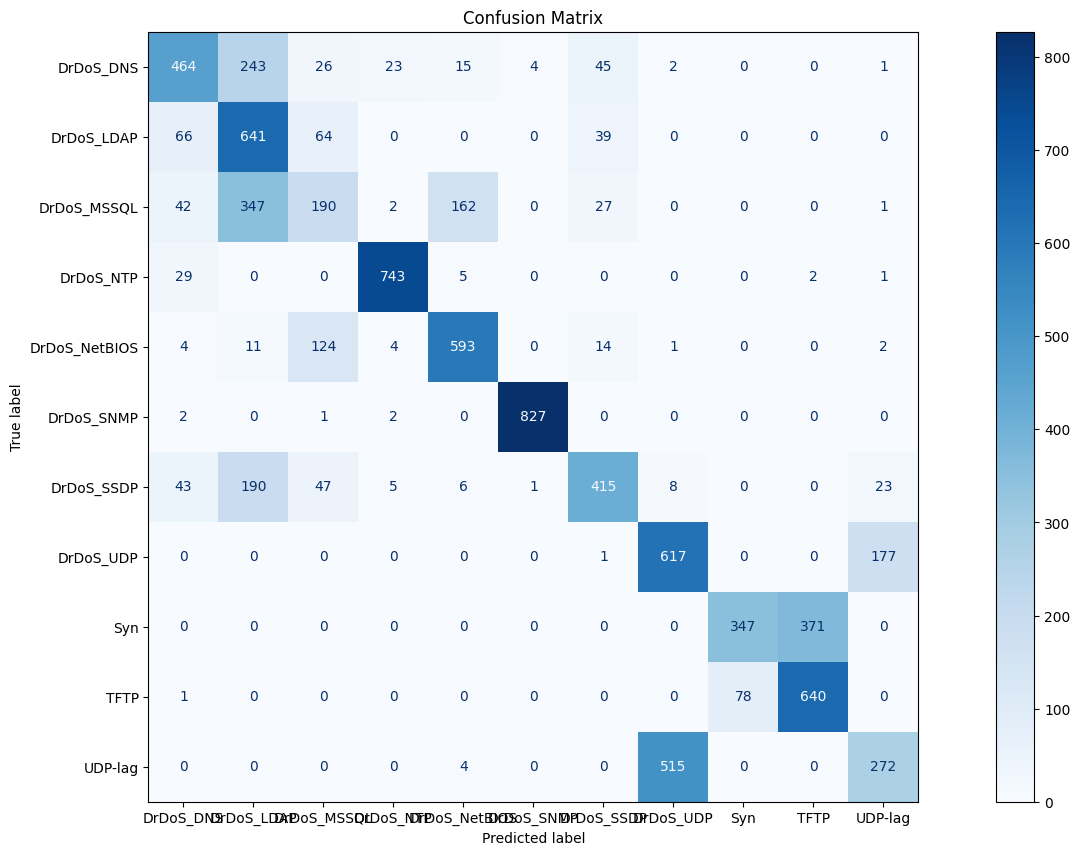

In [18]:
cm = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(20, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion Matrix")
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Encode string labels into numeric form
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Train logistic regression
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
clf.fit(X_train, y_train_enc)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))
print("Accuracy:", accuracy_score(y_test_enc, y_pred))


               precision    recall  f1-score   support

    DrDoS_DNS       0.77      0.21      0.33       823
   DrDoS_LDAP       0.47      0.65      0.54       810
  DrDoS_MSSQL       0.22      0.05      0.08       771
    DrDoS_NTP       0.83      0.89      0.86       780
DrDoS_NetBIOS       0.68      0.84      0.75       753
   DrDoS_SNMP       0.97      1.00      0.98       832
   DrDoS_SSDP       0.48      0.83      0.60       738
    DrDoS_UDP       0.52      0.75      0.62       795
          Syn       0.97      0.39      0.56       718
         TFTP       0.62      0.99      0.76       719
      UDP-lag       0.53      0.37      0.44       791

     accuracy                           0.63      8530
    macro avg       0.64      0.63      0.59      8530
 weighted avg       0.64      0.63      0.59      8530

Accuracy: 0.6304806565064478


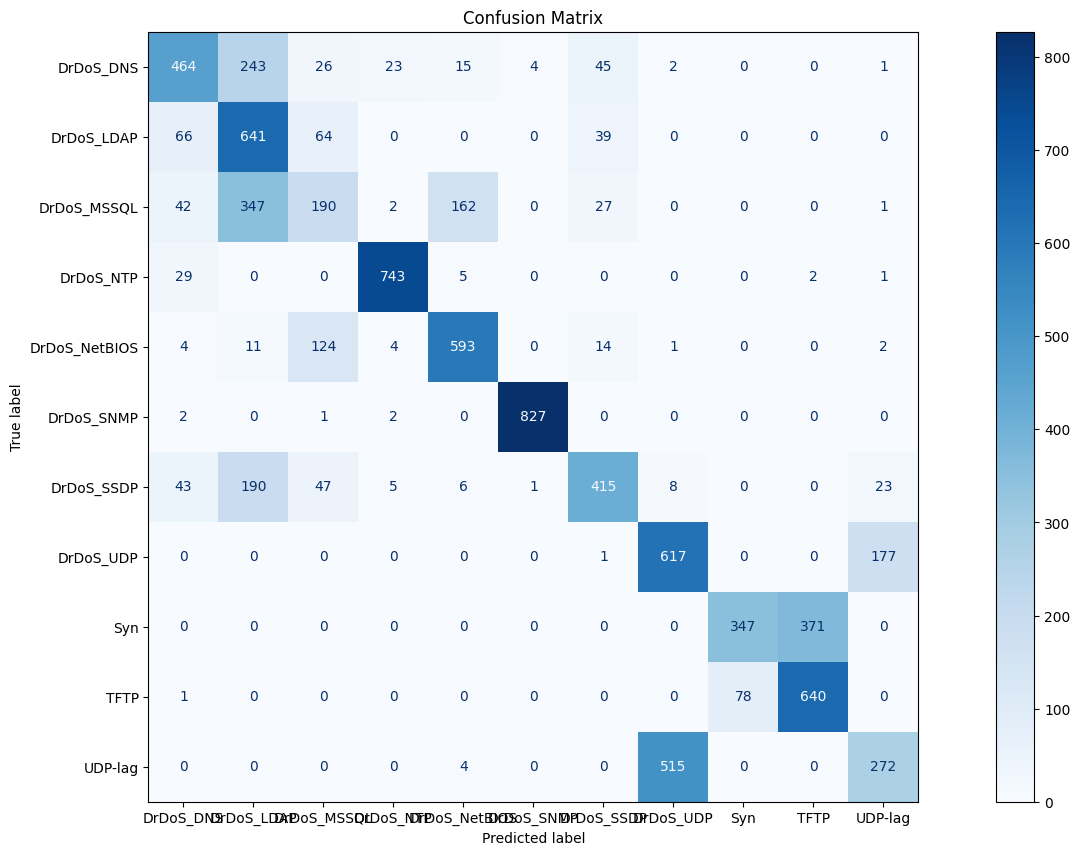

In [20]:
cm = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(20, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion Matrix")
plt.show()

In [21]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=1e-05,hidden_layer_sizes=(32),max_iter=1000)
mlp.fit(X_train,y_train)
y_test = mlp.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

               precision    recall  f1-score   support

    DrDoS_DNS       0.61      0.67      0.64       595
   DrDoS_LDAP       0.63      0.82      0.71      1095
  DrDoS_MSSQL       0.18      0.71      0.29       117
    DrDoS_NTP       0.86      0.97      0.91       695
DrDoS_NetBIOS       0.92      0.79      0.85       913
   DrDoS_SNMP       1.00      0.99      1.00       839
   DrDoS_SSDP       0.93      0.42      0.58      1189
    DrDoS_UDP       0.86      0.84      0.85      1170
          Syn       0.71      0.97      0.82       311
         TFTP       0.99      0.89      0.94      1126
      UDP-lag       0.60      0.60      0.60       480

     accuracy                           0.78      8530
    macro avg       0.75      0.79      0.74      8530
 weighted avg       0.83      0.78      0.79      8530

0.783704572098476


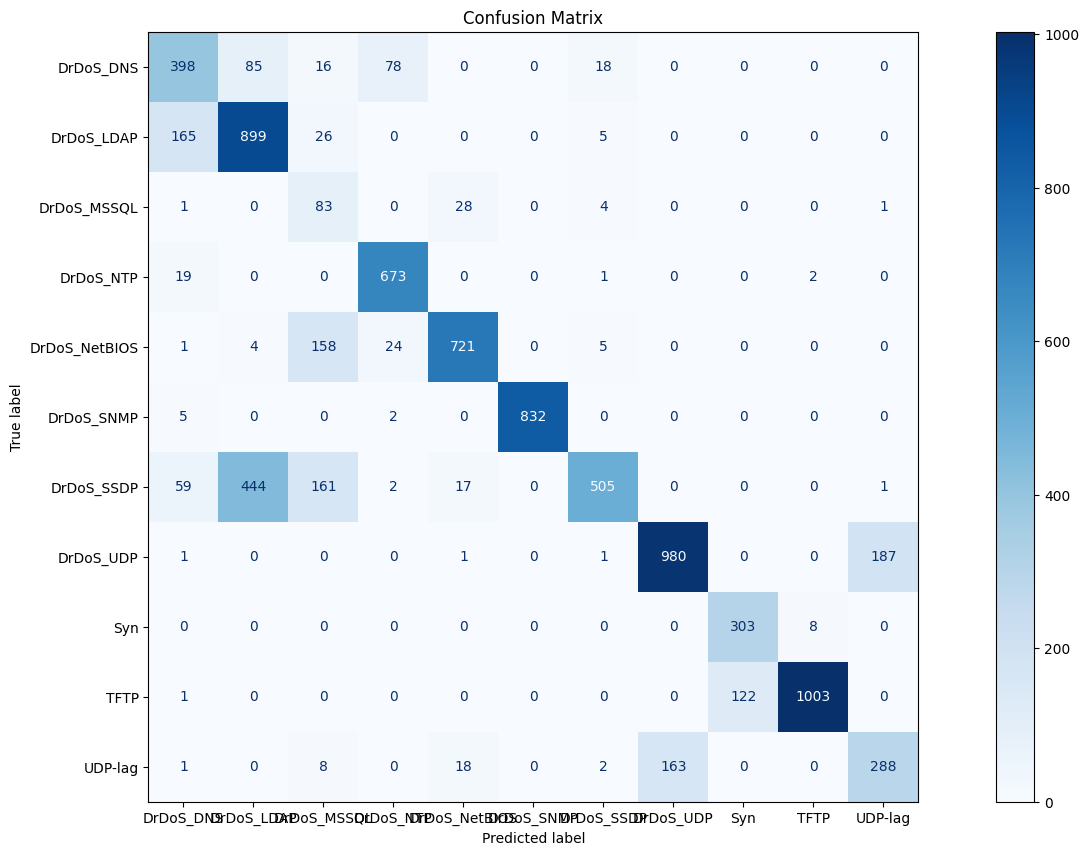

In [22]:
cm = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(20, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion Matrix")
plt.show()
